# CURARE Stack Overflow releases' Views

![](figures/stack-overflow-view.png)

## Retrieve ReleaseViews for every Stack Overflow dumped collections

In [1]:
import pandas as pd
import timeit
import ipywidgets as widgets
import time, threading
import json
import pymongo
from pymongo import MongoClient
import pprint
#from urlparse import urlparse
import urllib.parse
import matplotlib.pyplot as plt 
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go

import curare_releaseView as cr_View

In [2]:
start_time = timeit.default_timer()
view = cr_View.getViewsMongo().find_one() # json file, can be browsed as a dictionary
viewRel0=view['releaseViewList'][0]
viewRel1=view['releaseViewList'][1]
viewRel2=view['releaseViewList'][2]

# Exploring Stack Overflow Views

## Stack Overflow data collections' schema

### Get the schema of a given Stack Overflow collection

In [3]:
schema = cr_View.getReleaseViewSchemata(viewRel0, ("Posts", "Users", "Votes", "Badges", "Comments"))
cr_View.getSchemaAttributes(cr_View.getReleaseViewschema(schema, 'Comments'))      

('Comments',
 [('Id', 'int'),
  ('PostId', 'int'),
  ('VoteTypeId', 'int'),
  ('UserId', 'int'),
  ('CreationDate', 'timestamp'),
  ('BountyAmount', 'string')])

## Releases Statistics of the Stack Overflow View

### Size given in number of records 

In [4]:
countRel0 = cr_View.countReleaseViewItems(viewRel0)
countRel1 = cr_View.countReleaseViewItems(viewRel1)
countRel2 = cr_View.countReleaseViewItems(viewRel2)

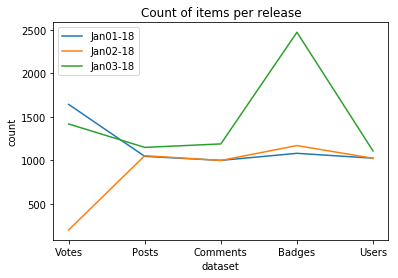

In [5]:
cr_View.plotViewReleasesRecordsNumber((countRel0, countRel1, countRel2),  
                                       ('Votes','Posts','Comments','Badges','Users'), 
                                       ('Jan01-18','Jan02-18','Jan03-18'), 
                                        'dataset', 'count', 'Count of items per release')


## Analytics using the schema information

### Releases quality: number of null values in collections' releases¶

In [6]:
nullsRel0 = cr_View.getReleaseViewNullValues(viewRel0)
nullsRel1 = cr_View.getReleaseViewNullValues(viewRel1)
nullsRe12 = cr_View.getReleaseViewNullValues(viewRel2)

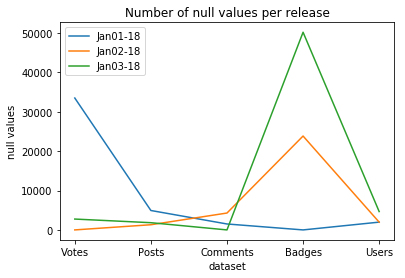

In [7]:
cr_View.plotViewReleasesRecordsNumber((nullsRel0, nullsRel1, nullsRe12),  
                                       ('Votes','Posts','Comments','Badges','Users'), 
                                       ('Jan01-18','Jan02-18','Jan03-18'), 'dataset', 'null values', 
                                        'Number of null values per release')

## Releases collections attributes statistics

### Release 1

In [9]:
releaseViewStats = cr_View.getReleaseViewAttributesStats(viewRel0,0)
releaseViewStats[2]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [10]:
releaseViewStats = cr_View.getReleaseViewAttributesStats(viewRel0,0)
print("Data collection name:", releaseViewStats[0])
print("Number or records:", releaseViewStats[1])

df10 = cr_View.buildTabularReleaseViewAttributeStats(schema, 0, releaseViewStats, 
                                                     ["Attribute", "Min value", "Max value", "Mean value", "Median value", "Null value"])
df10

Data collection name: ../releases/jan-02-03_2018/POSTS_jan-02-03_2018.csv
Number or records: 1642


,Attribute,Min value,Max value,Mean value,Median value,Null value
0,Id,1,472,39.230816,26,0
1,PostTypeId,0,382,5.461023,0,1379
2,AcceptedAnswerId,0,284,2.334957,0,1527
3,ParentId,0,158,0.981730,0,1568
4,CreationDate,0,101,1.300244,0,1529
5,DeletionDate,0,52,0.888551,0,1564
6,Score,0,87,0.905603,0,1543
7,ViewCount,0,62,0.552375,0,1588
8,Body,0,653,7.005481,0,1544
9,OwnerUserId,0,78,0.158343,0,1568


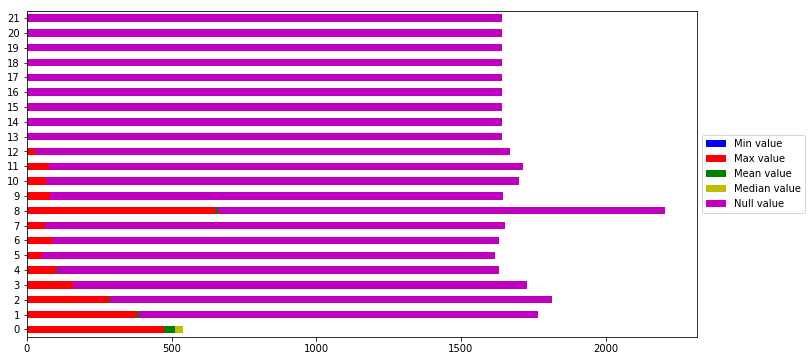

In [11]:
cr_View.plotDataFrame(df10, 'ViewStackOverflowStats-Votes.png')

In [12]:
releaseViewStats = cr_View.getReleaseViewAttributesStats(viewRel0,1)
print("Data collection name:", releaseViewStats[0])
print("Number or records:", releaseViewStats[1])

df11 = cr_View. buildTabularReleaseViewAttributeStats(schema, 1, releaseViewStats, 
                                                      ["Attribute", "Min value", "Max value", "Mean value", "Median value", "Null value"])
df11

Data collection name: ../releases/jan-02-03_2018/USERS_jan-02-03_2018.csv
Number or records: 1045


,Attribute,Min value,Max value,Mean value,Median value,Null value
0,Id,4,352,9.911962e+00,7,0
1,Reputation,0,131,1.856459e+00,1,67
2,CreationDate,0,104,1.713876e+01,19,76
3,DisplayName,0,99,1.230909e+01,10,84
4,LastAccessDate,0,54,1.673971e+01,19,125
5,WebsiteUrl,0,145,1.105263e+00,0,978
6,Location,0,68,7.004785e+00,0,687
7,AboutMe,0,578,5.273684e+00,0,1004
8,Views,0,29,9.014354e-01,1,169
9,UpVotes,0,76,9.148325e-01,1,169


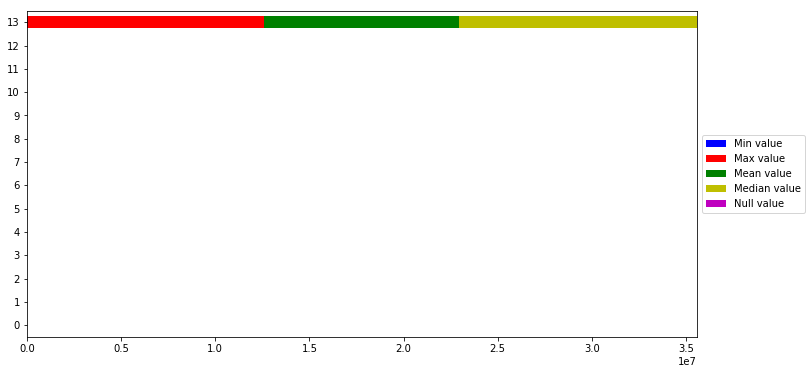

In [13]:
cr_View.plotDataFrame(df11, 'ViewStackOverflowStats-Users.png')

In [14]:
releaseViewStats = cr_View.getReleaseViewAttributesStats(viewRel0,2)
print("Data collection name:", releaseViewStats[0])
print("Number or records:", releaseViewStats[1])

df12 = cr_View.buildTabularReleaseViewAttributeStats(schema, 2, releaseViewStats, 
                                                     ["Attribute", "Min value", "Max value", "Mean value", "Median value", "Null value"])
df12

Data collection name: ../releases/jan-02-03_2018/COMMENTS_jan-02-03_2018.csv
Number or records: 999


,Attribute,Min value,Max value,Mean value,Median value,Null value
0,Id,2,203,12.627628,8,0
1,PostId,0,288,8.914915,8,62
2,Score,0,199,1.741742,1,92
3,Text,0,600,133.719720,105,73
4,CreationDate,0,209,18.192192,19,144
5,UserDisplayName,0,394,1.857858,0,948
6,UserId,0,128,5.884885,7,190


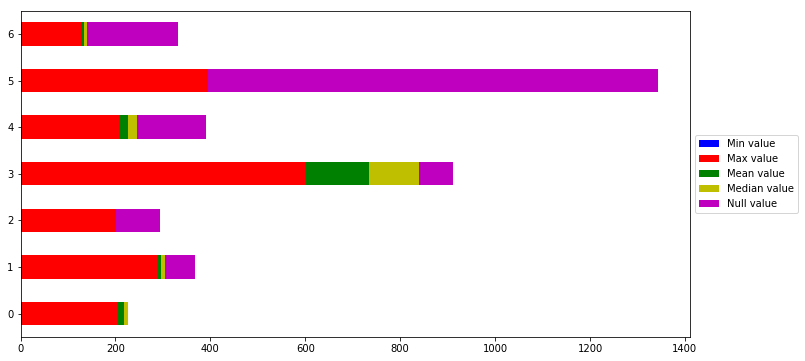

In [15]:
cr_View.plotDataFrame(df12, 'ViewStackOverflowStats-Comments.png')

In [16]:
releaseViewStats = cr_View.getReleaseViewAttributesStats(viewRel0,3)
print("Data collection name:", releaseViewStats[0])
print("Number or records:", releaseViewStats[1])

df13 = cr_View.buildTabularReleaseViewAttributeStats(schema, 3, releaseViewStats, 
                                                     ["Attribute", "Min value", "Max value", "Mean value", "Median value", "Null value"])
df13

Data collection name: ../releases/jan-02-03_2018/BADGES_jan-02-03_2018.csv
Number or records: 1080


,Attribute,Min value,Max value,Mean value,Median value,Null value
0,Id,26418911,26420004,2.641946e+07,26419458,0
1,UserId,1156,9162973,5.253555e+06,5514526,0
2,Name,4,17,1.036574e+01,9,0
3,Date,38,42,4.178241e+01,42,0
4,Class,1,3,2.000000e+00,3,0
5,TagBased,0,1,0.000000e+00,0,0


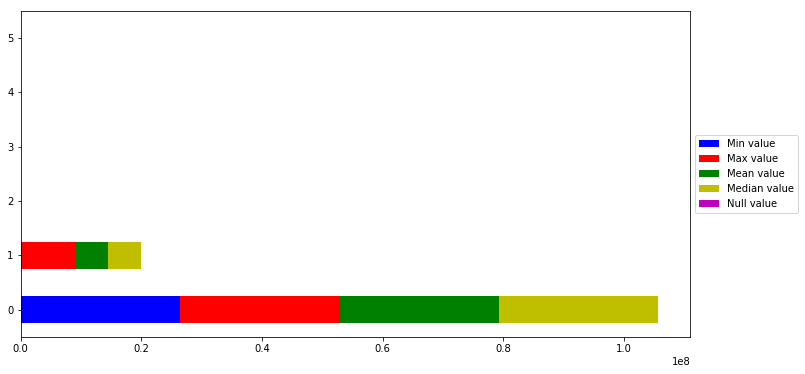

In [17]:
cr_View.plotDataFrame(df13, 'ViewStackOverflowStats-Bagdes.png')

In [18]:
releaseViewStats = cr_View.getReleaseViewAttributesStats(viewRel0,4)
print("Data collection name:", releaseViewStats[0])
print("Number or records:", releaseViewStats[1])

df14 = cr_View.buildTabularReleaseViewAttributeStats(schema, 4, releaseViewStats, 
                                                     ["Attribute", "Min value", "Max value", "Mean value", "Median value", "Null value"])
df14

Data collection name: ../releases/jan-02-03_2018/VOTES_jan-02-03_2018.csv
Number or records: 1024


,Attribute,Min value,Max value,Mean value,Median value,Null value
0,Id,154243649,154244722,154244187.0,154244186,0
1,PostId,1711,48054453,31190171.0,37947936,0
2,VoteTypeId,1,16,3.0,2,0
3,UserId,0,9159641,272554.0,0,955
4,CreationDate,37,37,37.0,37,0
5,BountyAmount,0,0,0.0,0,1024


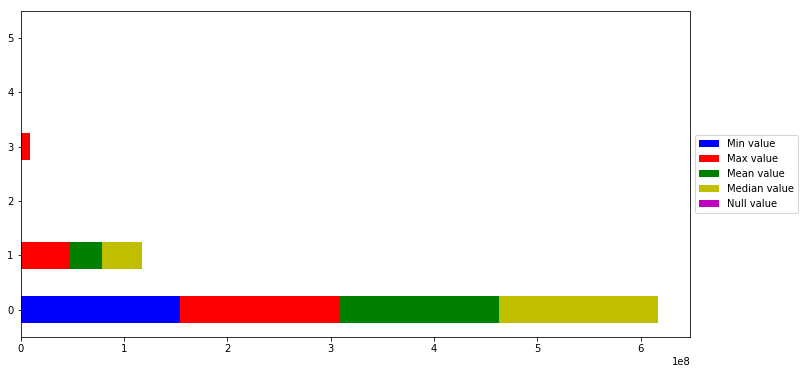

In [19]:
cr_View.plotDataFrame(df14, 'ViewStackOverflowStats-Votes.png')

### Release 2

In [20]:
schemaVR2 = cr_View.getReleaseViewSchemata(viewRel1, ("Posts", "Users", "Votes", "Badges", "Comments"))        

In [21]:
releaseViewStatsVR2 = cr_View.getReleaseViewAttributesStats(viewRel1,0)
print("Data collection name:", releaseViewStatsVR2[0])
print("Number or records:", releaseViewStatsVR2[1])

df20 = cr_View.buildTabularReleaseViewAttributeStats(schemaVR2, 0, releaseViewStatsVR2, 
                                                     ["Attribute", "Min value", "Max value", "Mean value", "Median value", "Null value"])
df20

Data collection name: ../releases/jan-01-02_2018/BADGES_jan-01-02_2018.csv
Number or records: 200


,Attribute,Min value,Max value,Mean value,Median value,Null value
0,Id,26412268,26412532,26412371.00,26412371,0
1,UserId,82511,9159531,5038208.00,4922868,0
2,Name,6,17,9.68,8,0
3,Date,40,42,41.36,42,0
4,Class,1,3,2.00,3,0
5,TagBased,0,0,0.00,0,0


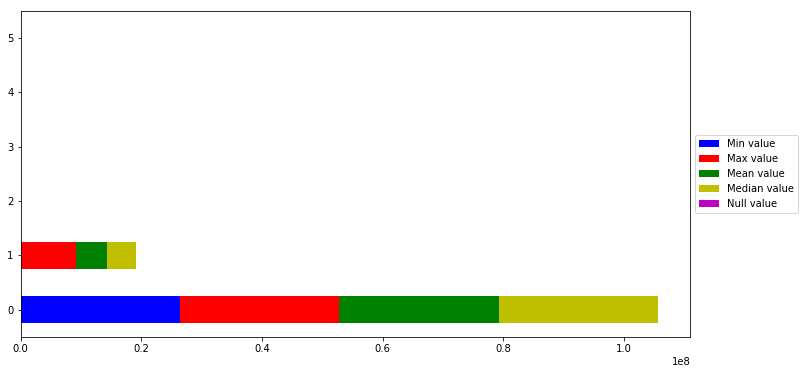

In [22]:
cr_View.plotDataFrame(df20, 'ViewStackOverflowStats-Votes20.png')

In [23]:
releaseViewStatsVR21 = cr_View.getReleaseViewAttributesStats(viewRel1,1)
print("Data collection name:", releaseViewStatsVR21[0])
print("Number or records:", releaseViewStatsVR21[1])

df21 = cr_View.buildTabularReleaseViewAttributeStats(schemaVR2, 1, releaseViewStatsVR21, 
                                                     ["Attribute", "Min value", "Max value", "Mean value", "Median value", "Null value"])
df21

Data collection name: ../releases/jan-01-02_2018/COMMENTS_jan-01-02_2018.csv
Number or records: 1053


,Attribute,Min value,Max value,Mean value,Median value,Null value
0,Id,2,273,10.903134,8,0
1,PostId,0,142,8.638177,8,27
2,Score,0,100,1.437797,1,51
3,Text,0,600,152.200380,117,37
4,CreationDate,0,335,20.372270,19,92
5,UserDisplayName,0,245,2.421652,0,973
6,UserId,0,164,6.924027,7,136


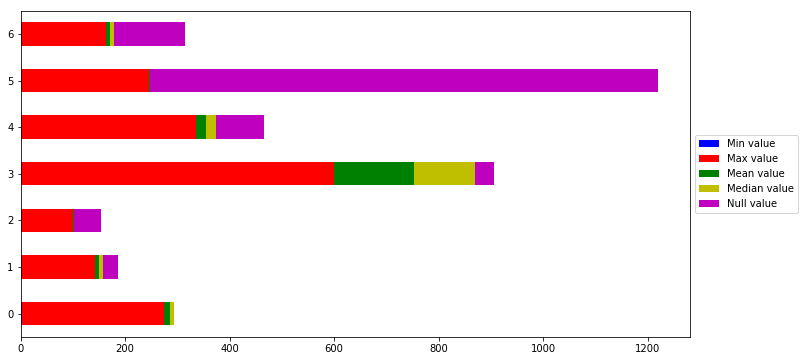

In [24]:
cr_View.plotDataFrame(df21, 'ViewStackOverflowStats-Comments20.png')

In [25]:
releaseViewStatsVR22 = cr_View.getReleaseViewAttributesStats(viewRel1,2)
print("Data collection name:", releaseViewStatsVR22[0])
print("Number or records:", releaseViewStatsVR22[1])

df22 = cr_View.buildTabularReleaseViewAttributeStats(schemaVR2, 2, releaseViewStatsVR22, 
                                                     ["Attribute", "Min value", "Max value", "Mean value", "Median value", "Null value"])
df22

Data collection name: ../releases/jan-01-02_2018/USERS_jan-01-02_2018.csv
Number or records: 998


,Attribute,Min value,Max value,Mean value,Median value,Null value
0,Id,5,170,9.092184e+00,7,0
1,Reputation,0,165,1.712425e+00,1,22
2,CreationDate,0,139,1.808517e+01,19,26
3,DisplayName,0,99,1.312525e+01,11,31
4,LastAccessDate,0,96,1.767435e+01,19,74
5,WebsiteUrl,0,82,1.175351e+00,0,929
6,Location,0,64,7.035070e+00,0,650
7,AboutMe,0,783,5.514028e+00,0,955
8,Views,0,108,1.048096e+00,1,115
9,UpVotes,0,70,9.589178e-01,1,116


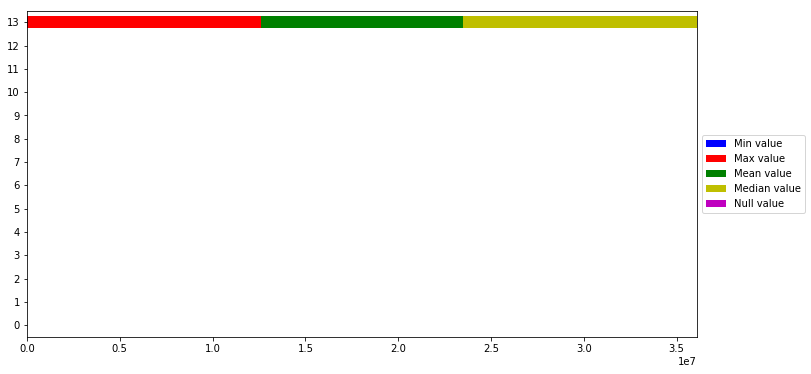

In [26]:
cr_View.plotDataFrame(df22, 'ViewStackOverflowStats-Users20.png')

In [27]:
releaseViewStatsVR23 = cr_View.getReleaseViewAttributesStats(viewRel1,3)
print("Data collection name:", releaseViewStatsVR23[0])
print("Number or records:", releaseViewStatsVR23[1])

df23 = cr_View.buildTabularReleaseViewAttributeStats(schemaVR2, 3, releaseViewStatsVR23, 
                                                     ["Attribute", "Min value", "Max value", "Mean value", "Median value", "Null value"])
df23

Data collection name: ../releases/jan-01-02_2018/POSTS_jan-01-02_2018.csv
Number or records: 1169


,Attribute,Min value,Max value,Mean value,Median value,Null value
0,Id,1,1058,41.883661,27,0
1,PostTypeId,0,271,3.780154,0,970
2,AcceptedAnswerId,0,89,1.171942,0,1088
3,ParentId,0,132,0.663815,0,1129
4,CreationDate,0,77,1.264328,0,1094
5,DeletionDate,0,41,0.823781,0,1118
6,Score,0,114,1.028229,0,1100
7,ViewCount,0,56,0.628743,0,1125
8,Body,0,494,6.452524,0,1100
9,OwnerUserId,0,119,0.384089,0,1113


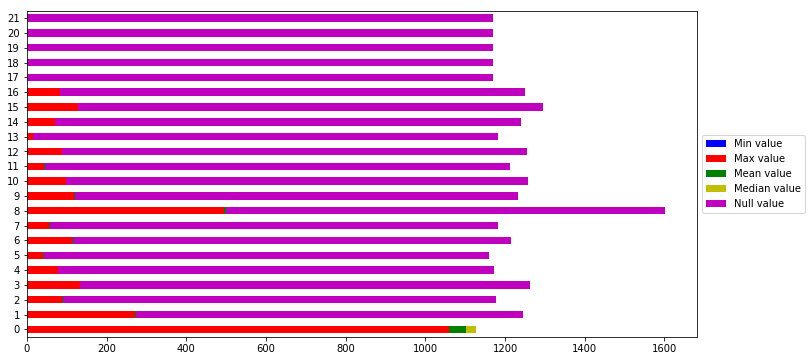

In [28]:
cr_View.plotDataFrame(df23, 'ViewStackOverflowStats-Users30.png')

In [29]:
releaseViewStatsVR24 = cr_View.getReleaseViewAttributesStats(viewRel1,4)
print("Data collection name:", releaseViewStatsVR24[0])
print("Number or records:", releaseViewStatsVR24[1])

df24 = cr_View.buildTabularReleaseViewAttributeStats(schemaVR2, 4, releaseViewStatsVR24, 
                                                     ["Attribute", "Min value", "Max value", "Mean value", "Median value", "Null value"])
df24

Data collection name: ../releases/jan-01-02_2018/VOTES_jan-01-02_2018.csv
Number or records: 1023


,Attribute,Min value,Max value,Mean value,Median value,Null value
0,Id,154211782,154212901,154212346.0,154212348,0
1,PostId,154,48046608,33008414.0,44029065,0
2,VoteTypeId,1,16,3.0,2,0
3,UserId,0,9159420,365925.0,0,949
4,CreationDate,37,37,37.0,37,0
5,BountyAmount,0,0,0.0,0,1023


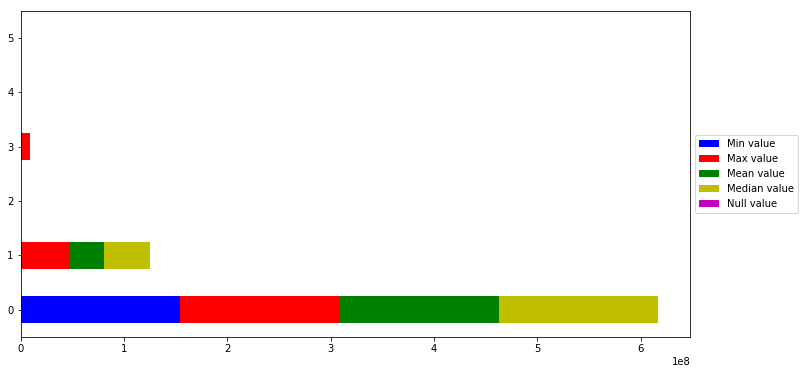

In [30]:
cr_View.plotDataFrame(df24, 'ViewStackOverflowStats-Votes30.png')

### Release 3

In [31]:
schemaVR3 = cr_View.getReleaseViewSchemata(viewRel2, ("Posts", "Users", "Votes", "Badges", "Comments"))        

In [32]:
releaseViewStatsVR3 = cr_View.getReleaseViewAttributesStats(viewRel2,0)
print("Data collection name:", releaseViewStatsVR3[0])
print("Number or records:", releaseViewStatsVR3[1])

df30 = cr_View.buildTabularReleaseViewAttributeStats(schemaVR3, 0, releaseViewStatsVR3, 
                                                     ["Attribute", "Min value", "Max value", "Mean value", "Median value", "Null value"])
df30

Data collection name: ../releases/jan-03-04_2018/VOTES_jan-03-04_2018.csv
Number or records: 1417


,Attribute,Min value,Max value,Mean value,Median value,Null value
0,Id,154306485,154308014,154307249.0,154307252,0
1,PostId,3255,48069790,31790288.0,39562769,0
2,VoteTypeId,1,16,3.0,2,0
3,UserId,0,9165856,178271.0,0,1345
4,CreationDate,37,37,37.0,37,0
5,BountyAmount,0,250,0.0,0,1413


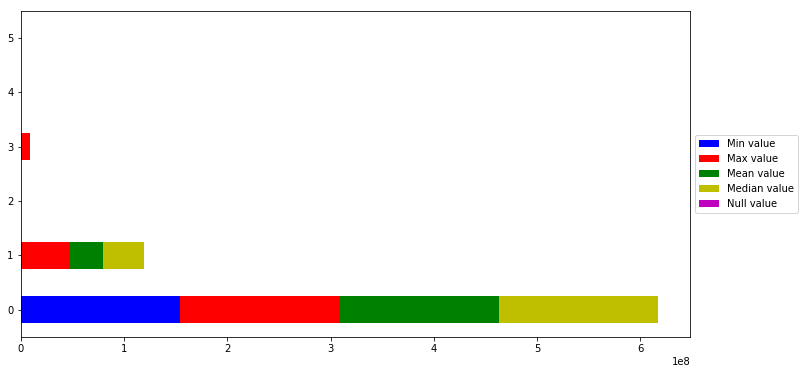

In [33]:
cr_View.plotDataFrame(df30, 'ViewStackOverflowStats-Votes40.png')

In [34]:
releaseViewStatsVR31 = cr_View.getReleaseViewAttributesStats(viewRel2,1)
print("Data collection name:", releaseViewStatsVR31[0])
print("Number or records:", releaseViewStatsVR31[1])

df31 = cr_View.buildTabularReleaseViewAttributeStats(schemaVR3, 1, releaseViewStatsVR31, 
                                                     ["Attribute", "Min value", "Max value", "Mean value", "Median value", "Null value"])
df31

Data collection name: ../releases/jan-03-04_2018/COMMENTS_jan-03-04_2018.csv
Number or records: 1148


,Attribute,Min value,Max value,Mean value,Median value,Null value
0,Id,1,439,12.860627,8,0
1,PostId,0,217,9.123693,8,77
2,Score,0,87,1.444251,1,127
3,Text,0,599,116.584495,88,108
4,CreationDate,0,372,17.168118,19,190
5,UserDisplayName,0,164,1.183798,0,1099
6,UserId,0,104,5.682927,7,233


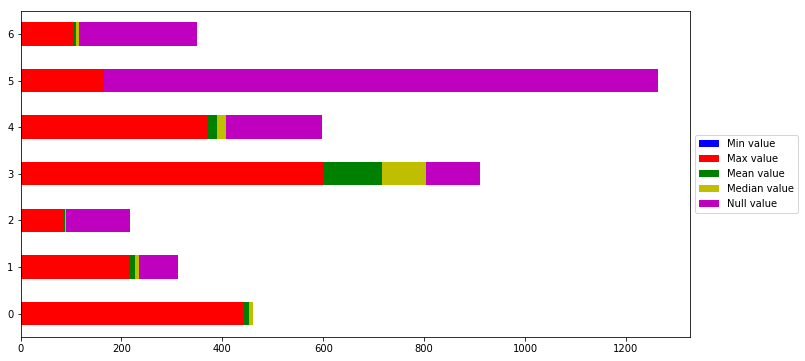

In [35]:
cr_View.plotDataFrame(df31, 'ViewStackOverflowStats-Comments40.png')

In [36]:
releaseViewStatsVR32 = cr_View.getReleaseViewAttributesStats(viewRel2,2)
print("Data collection name:", releaseViewStatsVR32[0])
print("Number or records:", releaseViewStatsVR32[1])

df32 = cr_View.buildTabularReleaseViewAttributeStats(schemaVR3, 2, releaseViewStatsVR32, 
                                                     ["Attribute", "Min value", "Max value", "Mean value", "Median value", "Null value"])
df32

Data collection name: ../releases/jan-03-04_2018/BADGES_jan-03-04_2018.csv
Number or records: 1188


,Attribute,Min value,Max value,Mean value,Median value,Null value
0,Id,26427502,26432068,2.642948e+07,26428495,0
1,UserId,893,9167763,5.152137e+06,5174641,0
2,Name,4,17,1.018687e+01,9,0
3,Date,37,43,4.203620e+01,42,0
4,Class,1,3,2.000000e+00,3,0
5,TagBased,0,1,0.000000e+00,0,0


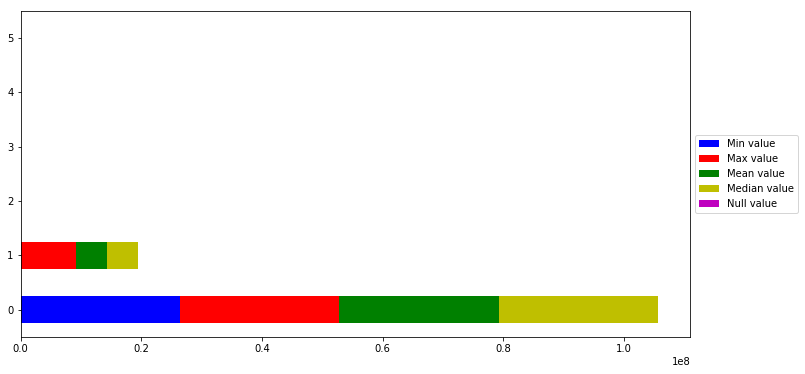

In [37]:
cr_View.plotDataFrame(df32, 'ViewStackOverflowStats-Badges40.png')

In [38]:
releaseViewStatsVR33 = cr_View.getReleaseViewAttributesStats(viewRel2,3)
print("Data collection name:", releaseViewStatsVR33[0])
print("Number or records:", releaseViewStatsVR33[1])

df33 = cr_View.buildTabularReleaseViewAttributeStats(schemaVR3, 3, releaseViewStatsVR33, 
                                                     ["Attribute", "Min value", "Max value", "Mean value", "Median value", "Null value"])
df33

Data collection name: ../releases/jan-03-04_2018/POSTS_jan-03-04_2018.csv
Number or records: 2471


,Attribute,Min value,Max value,Mean value,Median value,Null value
0,Id,1,909,42.261028,25,0
1,PostTypeId,0,376,5.498988,0,2064
2,AcceptedAnswerId,0,232,2.001214,0,2296
3,ParentId,0,208,0.889114,0,2355
4,CreationDate,0,672,2.051396,0,2268
5,DeletionDate,0,233,1.322541,0,2329
6,Score,0,104,1.217321,0,2290
7,ViewCount,0,88,0.750304,0,2365
8,Body,0,607,7.131930,0,2294
9,OwnerUserId,0,439,0.479563,0,2337


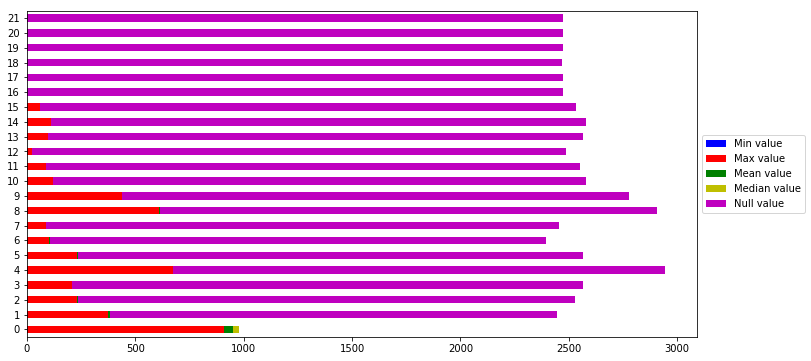

In [39]:
cr_View.plotDataFrame(df33, 'ViewStackOverflowStats-Posts40.png')

In [40]:
releaseViewStatsVR34 = cr_View.getReleaseViewAttributesStats(viewRel2,4)
print("Data collection name:", releaseViewStatsVR34[0])
print("Number or records:", releaseViewStatsVR34[1])

df34 = cr_View.buildTabularReleaseViewAttributeStats(schemaVR3, 4, releaseViewStatsVR34, 
                                                     ["Attribute", "Min value", "Max value", "Mean value", "Median value", "Null value"])
df34

Data collection name: ../releases/jan-03-04_2018/USERS_jan-03-04_2018.csv
Number or records: 1107


,Attribute,Min value,Max value,Mean value,Median value,Null value
0,Id,5,347,8.808491,7,0
1,Reputation,0,327,1.955736,1,15
2,CreationDate,0,145,18.177055,19,18
3,DisplayName,0,210,12.679313,11,24
4,LastAccessDate,0,160,18.087624,19,65
5,WebsiteUrl,0,136,1.177055,0,1039
6,Location,0,61,6.546522,0,756
7,AboutMe,0,579,5.760614,0,1065
8,Views,0,46,1.016260,1,108
9,UpVotes,0,255,1.168022,1,108


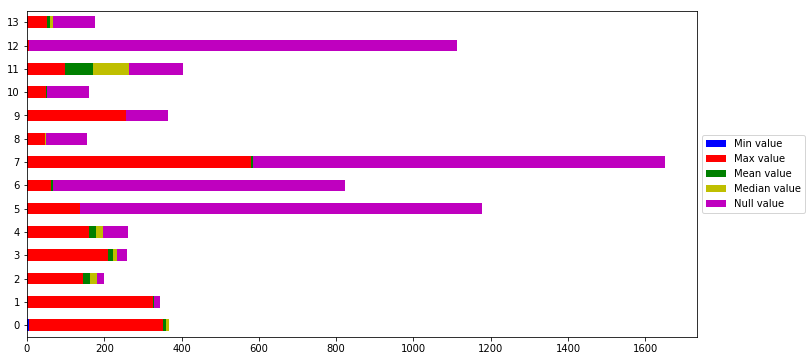

In [41]:
cr_View.plotDataFrame(df34, 'ViewStackOverflowStats-Users40.png')

### Execution time

In [42]:
elapsed = timeit.default_timer() - start_time

In [43]:
print ("execution time: " + str(elapsed) + " s")

execution time: 115.17462084400177 s
